In [1]:
#cek versi Tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
#load the dataset
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-10-11 21:53:27--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2021-10-11 21:53:27--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   176MB/s    in 0.4s    

2021-10-11 21:53:28 

In [3]:
#extract the data
import zipfile
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import os
#defining directory
base_dir = 'images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
#melihat struktur data
os.listdir('images')

['train', 'val', 'images', 'test']

In [6]:
os.listdir(train_dir)

['clean', 'messy']

In [7]:
os.listdir(validation_dir)

['clean', 'messy']

In [8]:
#membuat direktori ruangan rapi untuk data training
train_clean_dir = os.path.join(train_dir, 'clean')

#membuat direktori ruangan berantakan untuk data training
train_messy_dir = os.path.join(train_dir, 'messy')

#membuat direktori ruangan rapi untuk data validation
validation_clean_dir = os.path.join(validation_dir, 'clean')

#membuat direktori ruangan berantakan untuk data validation
validation_messy_dir = os.path.join(validation_dir, 'messy')

Image generator dapat digunakan untuk preprocessing data, pelabelan secara otomatis, augmentasi gambar.

In [9]:
#image augmenting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [10]:
#mempersiapkan data latih
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size = (150, 150), #mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size = 4,
    class_mode = 'binary' #kasus klasifikasi 2 kelas
)

#validation
validation_generator = test_datagen.flow_from_directory(
    validation_dir, #direktori data latih
    target_size = (150, 150), #mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size = 4,
    class_mode = 'binary' #kasus klasifikasi 2 kelas
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
#Arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
#compile pada objek
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
#image data generator otomatis melabeli gambar sesuai direktori disimpan
model.fit(
    train_generator,
    steps_per_epoch = 25, #jumlah batch yang akan dieksekusi tiap epoch
    epochs = 20,
    validation_data = validation_generator, #menampilkan akurasi pengujian data validasi
    validation_steps = 5, #jml batch yang akan dieksekusi tiap epoch
    verbose = 2
)

Epoch 1/20
25/25 - 8s - loss: 0.7228 - accuracy: 0.5200 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.7034 - accuracy: 0.4000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6945 - accuracy: 0.5400 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 7s - loss: 0.6931 - accuracy: 0.4700 - val_loss: 0.6916 - val_accuracy: 0.6000
Epoch 5/20
25/25 - 7s - loss: 0.6856 - accuracy: 0.5600 - val_loss: 0.6838 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 7s - loss: 0.6478 - accuracy: 0.6300 - val_loss: 0.4786 - val_accuracy: 0.8500
Epoch 7/20
25/25 - 7s - loss: 0.6633 - accuracy: 0.7000 - val_loss: 0.5993 - val_accuracy: 0.7500
Epoch 8/20
25/25 - 7s - loss: 0.6073 - accuracy: 0.7200 - val_loss: 0.5898 - val_accuracy: 0.6500
Epoch 9/20
25/25 - 6s - loss: 0.6170 - accuracy: 0.6700 - val_loss: 0.6097 - val_accuracy: 0.6500
Epoch 10/20
25/25 - 7s - loss: 0.6205 - accuracy: 0.7600 - val_loss: 0.5427 - val_accuracy: 0.7000
Epoch 11/20
25/25 -

Saving bedroom.jpg to bedroom.jpg
bedroom.jpg
messy


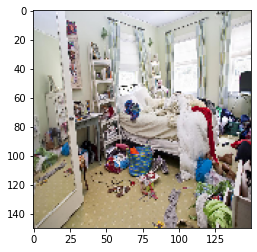

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')